## Complete tasks, using Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./NationalNames.csv')
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


### 1) Show first 8 rows of data.

In [3]:
df[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


### 2) Show last 8 rows of data.

In [4]:
df[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### 3) Get names of columns

In [5]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

### 5) Find the number of unique names in dataset

In [6]:
df['Name'].nunique()

93889

### 10) Count the number of unique names for each year

In [7]:
df.groupby('Year')['Name'].nunique()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

### 11) Find a year with the highest number of unique names

In [8]:
df.groupby('Year')['Name'].nunique().sort_values(ascending=False).head(1)

Year
2008    32488
Name: Name, dtype: int64

### 12) Find the most popular name of the year with most unique names

In [9]:
most_unique_year = df.groupby('Year')['Name'].nunique().idxmax()
year_df = df[df['Year'] == most_unique_year]
year_df.sort_values('Count', ascending=False).iloc[0]['Name']

'Jacob'

### 13) Find a year when name 'Jacob' was the most popular among female names

In [10]:
female_df = df[df['Gender'] == 'F']
jacob_df = female_df[female_df['Name'] == 'Jacob']
jacob_df.sort_values('Count', ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


### 14) Find a year with the highest number of gender-neutral names (male and female names at once)

In [11]:
male_names = df[df['Gender'] == 'M'].groupby(['Year', 'Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Year', 'Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
male_names = male_names.loc[gender_neutral_names]
gender_neutral_counts = male_names.groupby(level=0).count()
gender_neutral_counts.sort_values(ascending=False).head(1)

Year
2008    2557
Name: Count, dtype: int64

### 15) Find the number of births for each year

In [12]:
df.groupby('Year')['Count'].sum().head()

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64

### 16) Find a year when the most children were born

In [13]:
df.groupby('Year')['Count'].sum().idxmax()

1957

### 17) Find the number of girls and boys who were born each year

In [14]:
df.groupby(['Year', 'Gender'])['Count'].sum().unstack().head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


### 18) Count the number of years when there were born more girls than boys

In [15]:
boys_girls_count = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
boys_girls_count[boys_girls_count['F'] > boys_girls_count['M']].shape[0]

54

### 21) Count how many times the name 'Barbara' was given to boys

In [16]:
df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

4139

### 22) Count for how many years were the observations made

In [17]:
num_of_years = len(df['Year'].unique())
f"The observations were made for {num_of_years} years."

'The observations were made for 135 years.'

### 23) Find the most popular gender-neutral names (given each year)

In [18]:
num_of_years = len(df['Year'].unique())
male_names = df[df['Gender'] == 'M'].groupby(['Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
df[df['Name'].isin(gender_neutral_names)].groupby('Name').filter(lambda x: x['Year'].nunique() == num_of_years)['Name'].unique()

array(['Mary', 'Anna', 'Emma', 'Elizabeth', 'Minnie', 'Margaret', 'Ida',
       'Alice', 'Bertha', 'Sarah', 'Annie', 'Clara', 'Ella', 'Florence',
       'Cora', 'Martha', 'Laura', 'Nellie', 'Grace', 'Carrie', 'Maude',
       'Mabel', 'Bessie', 'Jennie', 'Gertrude', 'Julia', 'Hattie',
       'Edith', 'Mattie', 'Rose', 'Catherine', 'Lillian', 'Ada', 'Lillie',
       'Helen', 'Jessie', 'Louise', 'Ethel', 'Lula', 'Eva', 'Frances',
       'Lena', 'Lucy', 'Edna', 'Maggie', 'Pearl', 'Daisy', 'Fannie',
       'Josephine', 'Dora', 'Rosa', 'Katherine', 'Agnes', 'Marie', 'Nora',
       'May', 'Mamie', 'Blanche', 'Stella', 'Ellen', 'Nancy', 'Effie',
       'Sallie', 'Nettie', 'Della', 'Lizzie', 'Flora', 'Susie', 'Mae',
       'Etta', 'Harriet', 'Sadie', 'Caroline', 'Katie', 'Lydia', 'Elsie',
       'Kate', 'Susan', 'Mollie', 'Alma', 'Addie', 'Georgia', 'Eliza',
       'Lottie', 'Amanda', 'Charlotte', 'Rebecca', 'Ruth', 'Viola',
       'Olive', 'Amelia', 'Hannah', 'Jane', 'Virginia', 'Emily',
     

### 24) Find the most popular among unpopular names (unpopular name that was given to children most times)

In [19]:
years_threshold = 10
unpopular_names = df.groupby('Name').filter(lambda x: x['Year'].nunique() < years_threshold).groupby('Name')['Count'].sum()
unpopular_name = unpopular_names.sort_values(ascending=False).head(1)
f"The most popular name among unpopular ones (given in less than {years_threshold} years) is {unpopular_name.index[0]}, it was given {unpopular_name.values[0]} times."

'The most popular name among unpopular ones (given in less than 10 years) is Cataleya, it was given 2037 times.'

### 26) Plot graphs of distribution of female names John and male names Mary by years

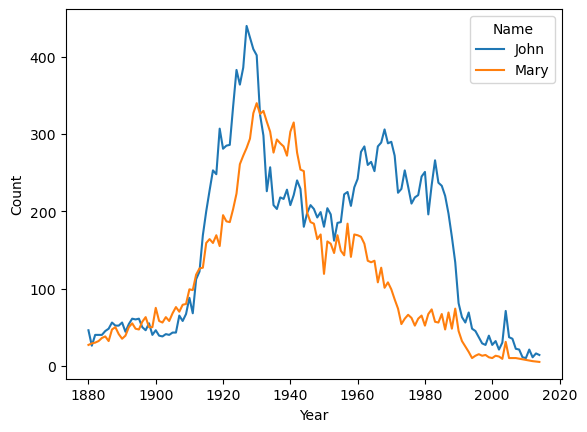

In [20]:
import matplotlib.pyplot as plt

john_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
mary_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

plt.plot(john_data['Year'], john_data['Count'], label='John')
plt.plot(mary_data['Year'], mary_data['Count'], label='Mary')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Name')

plt.show()